In [60]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [61]:
df=pd.read_csv("titanic.csv")
df
               

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
df.shape

(891, 12)

Dropping the unuseful columns as these columns do not affect the model
1.passengerID
2.Name
3.Ticket

In [63]:
df.drop(columns=["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [64]:
#new shape of the dataset
df.shape

(891, 9)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# EDA

In [66]:
#Information About The Dataset

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [68]:
#missing Values for dataset

In [69]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

It seems that 'Age','Cabin' and 'Embarked' has null values.Lets find out how many percentage they are covering from the dataset.

In [70]:
column_data = df.isna().sum().keys().tolist()
value_data = df.isna().sum().values.tolist()

missing_data = pd.DataFrame(list(zip(column_data, value_data)),columns=["Columns", "Missing Values"],index=list(range(1,10)))
missing_data["Missing %"] = round(((missing_data["Missing Values"]/df.shape[0])*100),2)

print("\nMissing Values for Titanic Data :-")
missing_data


Missing Values for Titanic Data :-


,Columns,Missing Values,Missing %
1,Survived,0,0.00
2,Pclass,0,0.00
3,Sex,0,0.00
4,Age,177,19.87
5,SibSp,0,0.00
6,Parch,0,0.00
7,Fare,0,0.00
8,Cabin,687,77.10
9,Embarked,2,0.22


Cabin column is covering heavy percentage as 77.1% while rest two coloumns have less covering percentage

In [71]:
#Lets Describe the dataset

In [72]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived is our Target column.It seems Age and Fare has some skewness so we need to focus on Age & Fare columns for filling null value because rest the columns are Classification

In [73]:
for col in df:
           print(col +"  "+str(df[df[col]==0].shape[0]))

Survived  549
Pclass  0
Sex  0
Age  0
SibSp  608
Parch  678
Fare  15
Cabin  0
Embarked  0


In [74]:
# Let's check Fare column where 0 values are present

df[df["Fare"]==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,0,3,male,36.0,0,0,0.0,NaN,S
263,0,1,male,40.0,0,0,0.0,B94,S
271,1,3,male,25.0,0,0,0.0,NaN,S
277,0,2,male,NaN,0,0,0.0,NaN,S
302,0,3,male,19.0,0,0,0.0,NaN,S
413,0,2,male,NaN,0,0,0.0,NaN,S
466,0,2,male,NaN,0,0,0.0,NaN,S
481,0,2,male,NaN,0,0,0.0,NaN,S
597,0,3,male,49.0,0,0,0.0,NaN,S
633,0,1,male,NaN,0,0,0.0,NaN,S


In [75]:
# Let's describe the categorical data

df.describe(include='object')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


<Figure size 504x504 with 0 Axes>

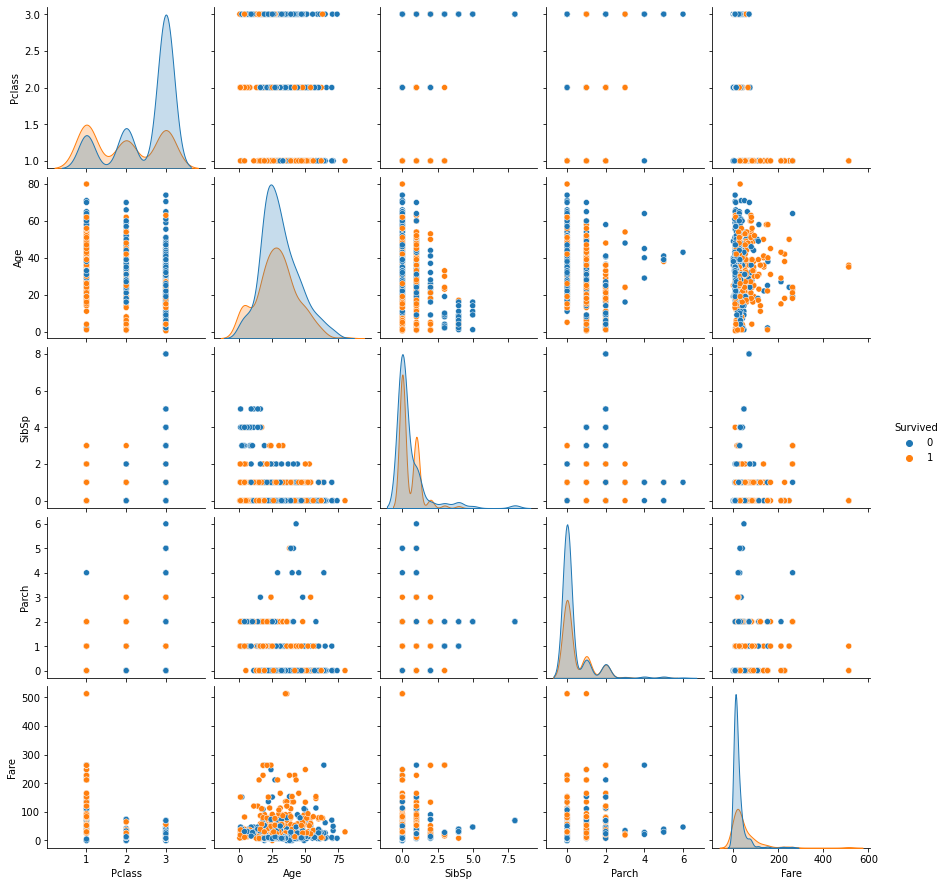

In [76]:
# Let's check pairplot with Survived
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.pairplot(df,hue="Survived")

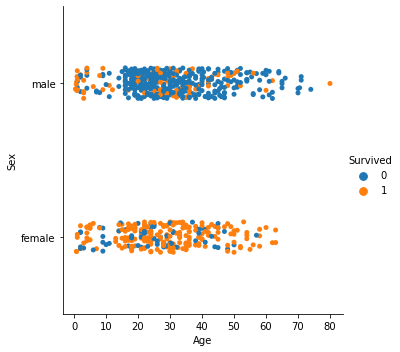

In [77]:
#Analysing

sns.catplot(x="Age",y="Sex",data=df,hue="Survived")

By above graph we can observe that females are more survive than men

In [78]:
#Handle the missing Data

# Dropna Embarked
df.dropna(subset=["Embarked"],inplace=True)

# Filling Age with its mean value
df.fillna(df["Age"].mean(), inplace=True)

# Filling Cabin with 0
df.fillna(df["Cabin"].mode(),inplace=True)

Cheking the null values again

In [79]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Now there is no null values

# check the Skewness

In [80]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.434355
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

we need to correct the skewness for 'Fare' only because the SibSp and Parch are the classification

In [81]:
# Let's separate the numerica columns and categorical columns

numerical = df.drop(columns=["Sex", "Cabin", "Embarked"])
categorical = df[["Sex", "Cabin", "Embarked"]]

Visualizing the Skewness with the distplot

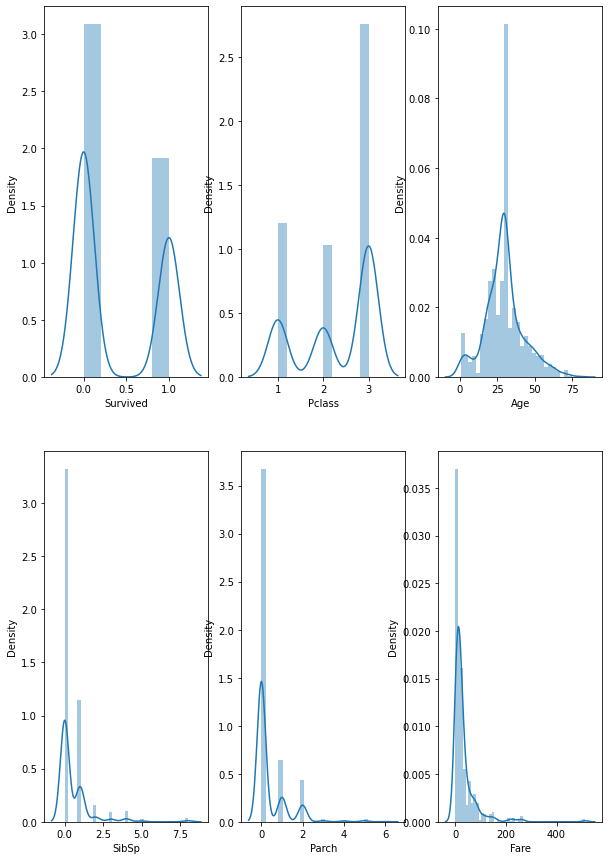

In [82]:
plt.figure(figsize=(10,15),facecolor='white')
graphplot=1
for column in numerical:
    if graphplot<=6:
        ax=plt.subplot(2,3,graphplot)
        sns.distplot(numerical[column])
    graphplot+=1
plt.show()    

We are observing that fare column has only skew rest column is the classification

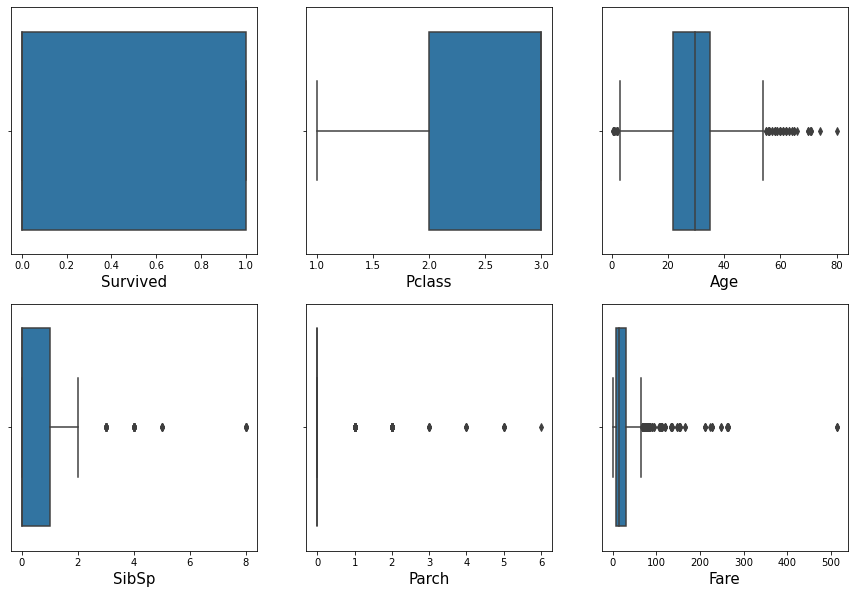

In [83]:
# Let's check the outliers

plt.figure(figsize = (15,10), facecolor='white')
graphplot = 1
for column in numerical:
    if graphplot<=6:
        ax = plt.subplot(2,3,graphplot)
        sns.boxplot(numerical[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

In [84]:
#Removing the outliers by using the ztransform

In [85]:
import numpy as np
from scipy.stats import zscore

z = np.abs(zscore(numerical))
df = df[(z<3).all(axis=1)]
df.shape

(818, 9)

In [86]:
#check the skewness again

In [87]:
df.skew()

Survived    0.457268
Pclass     -0.639191
Age         0.314053
SibSp       1.975774
Parch       2.118544
Fare        2.342849
dtype: float64

In [40]:
#Skewness is still availbale in fare so need to perform one more performence to remove the skewness

In [88]:
# Let's remove the pending skewness

for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index] = np.sqrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index] = np.cbrt(df[index])

In [90]:
# Let's check skewness again..

df.skew()

Survived    0.457268
Pclass     -0.799021
Age         0.314053
SibSp       1.133008
Parch       1.719456
Fare        1.363890
dtype: float64

In [91]:
#removing the skewness by using the power transformer

In [92]:
from sklearn.preprocessing import PowerTransformer
Features=["Pclass","Age","SibSp","Parch","Fare"]
Scaler=PowerTransformer(method="yeo-johnson")
df[Features]=Scaler.fit_transform(df[Features].values)

In [93]:
df.skew()

Survived    0.457268
Pclass     -0.456334
Age         0.071856
SibSp       0.943010
Parch       1.577507
Fare        0.043989
dtype: float64

It seems that skewness has gone from Fare column. Now Let's deal with categorical column

In [94]:
#Now lets deal with categorical columns

In [95]:
# Let's separate the input and output

x = df.drop("Survived", axis=1)
y = df["Survived"]

In [96]:
#correlation with features and target

x.corrwith(y)

Pclass   -0.319794
Age      -0.104474
SibSp     0.162401
Parch     0.212967
Fare      0.357993
dtype: float64

In [97]:
# Multicollinearity between features

corr = df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.319794,-0.104474,0.162401,0.212967,0.357993
Pclass,-0.319794,1.000000,-0.305205,-0.140809,-0.088213,-0.649681
Age,-0.104474,-0.305205,1.000000,-0.102791,-0.262648,0.122118
SibSp,0.162401,-0.140809,-0.102791,1.000000,0.346366,0.396769
Parch,0.212967,-0.088213,-0.262648,0.346366,1.000000,0.301684
Fare,0.357993,-0.649681,0.122118,0.396769,0.301684,1.000000


Drawing heatmap for better understanding of Multicollinearity

<function matplotlib.pyplot.show(close=None, block=None)>

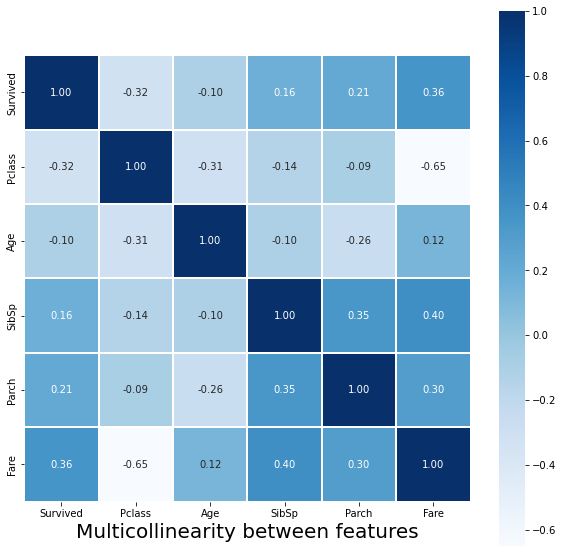

In [98]:
plt.figure(figsize=(10,12))
sns.heatmap(corr,cbar=True,square=True,annot=True,cbar_kws={"shrink":0.82},annot_kws={"size":10},cmap="Blues",fmt="0.2f",linewidths=0.2)
plt.xlabel("Multicollinearity between features",fontsize=20)
plt.show

# There is no multicollenerity between features and target so let's move ahead

In [99]:
# Converting categorical column to numerical column using OneHotEncoder

cat_to_conv = ["Sex", "Cabin", "Embarked"]

df = pd.get_dummies(df, columns=cat_to_conv)

df.shape

(818, 146)

In [101]:
# Let's separate the input and output again..

x = df.drop(columns = ["Survived"],axis=1)
y = df["Survived"]

In [103]:
# Let's do Scaling first before proceeding to the VIF Score

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

x_scaled

array([[ 0.8667975 , -0.61590471,  1.56022516, ..., -0.47966153,
        -0.3082967 ,  0.61408825],
       [-1.49047043,  0.69268819,  1.56022516, ...,  2.0848034 ,
        -0.3082967 , -1.62843045],
       [ 0.8667975 , -0.28032048, -0.63478839, ..., -0.47966153,
        -0.3082967 ,  0.61408825],
       ...,
       [ 0.8667975 ,  0.01983199,  1.56022516, ..., -0.47966153,
        -0.3082967 ,  0.61408825],
       [-1.49047043, -0.28032048, -0.63478839, ...,  2.0848034 ,
        -0.3082967 , -1.62843045],
       [ 0.8667975 ,  0.21174835, -0.63478839, ..., -0.47966153,
         3.24362864, -1.62843045]])

In [105]:
# Let's check the VIF Score first..

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
                    
vif.head(5)

,VIF Score,Features
0,2.992252,Pclass
1,1.714227,Age
2,1.835861,SibSp
3,1.981444,Parch
4,3.455896,Fare


VIF score is less than 5 so multicolliniearity is not present

In [106]:
# Target Column (Survived) Analysis

df["Survived"].value_counts()

0    500
1    318
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

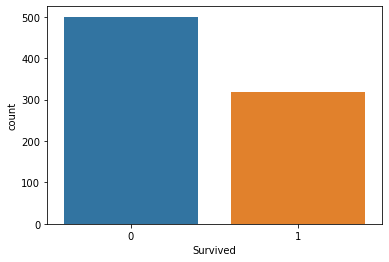

In [107]:
# Let's plot countplot for better analysis

sns.countplot(df["Survived"])

<AxesSubplot:ylabel='Survived'>

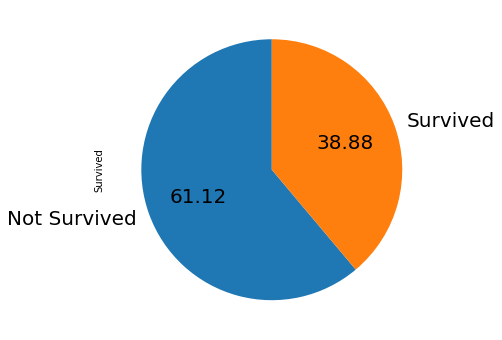

In [108]:
# let's plot a pie chart to check the contribution of each

df["Survived"].value_counts().plot.pie(figsize=(6,6), autopct="%1.2f",startangle=90,
                                                 labels=["Not Survived","Survived"],fontsize=20)

In [109]:
# Oversampling for class Imbalance


from imblearn.over_sampling import SMOTE

SM = SMOTE()

x,y = SM.fit_resample(x,y)

y.value_counts()

0    500
1    500
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

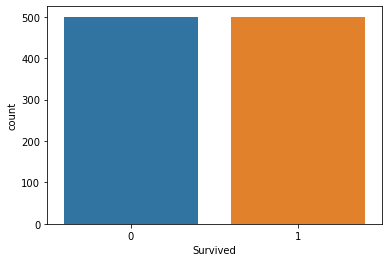

In [110]:
# Let's check countplot again...

sns.countplot(y)

class is balanced

In [112]:
# Let's do scaling again for the latest unsampled data

from sklearn.preprocessing import StandardScaler

sca = StandardScaler()
x_scal = sca.fit_transform(x)

x_scal

array([[ 0.94127639, -0.57229328,  1.50257738, ..., -0.47959598,
        -0.30282513,  0.64686916],
       [-1.37946919,  0.714105  ,  1.50257738, ...,  2.08508839,
        -0.30282513, -1.54590766],
       [ 0.94127639, -0.24240079, -0.6592336 , ..., -0.47959598,
        -0.30282513,  0.64686916],
       ...,
       [-1.37946919,  0.70824911,  1.50257738, ..., -0.47959598,
        -0.30282513, -1.54590766],
       [-1.37946919, -0.38500982,  1.50257738, ...,  2.08508839,
        -0.30282513, -1.54590766],
       [-1.37946919, -0.41184517, -0.6592336 , ..., -0.47959598,
        -0.30282513,  0.64686916]])

In [114]:
# Shape of final data

df.shape

(818, 146)

Number of component explaining 95% variance :  131


[]

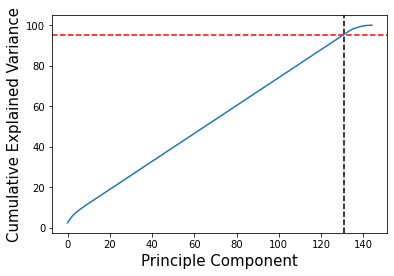

In [116]:
 #There are so many columns. So, Let's use the PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(x_scal)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>95)
print("Number of component explaining 95% variance : ",k)

plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=15)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
plt.plot(var_cumu)
plt.plot()

In [117]:
# Finalysing the features with PCA for model buildings

Pca = PCA(n_components = 131)
df_x = Pca.fit_transform(x_scal)

df_x

array([[-1.59940800e+00, -1.10038790e-01,  5.01480608e-01, ...,
         7.31858305e-17,  1.87525803e-15,  9.82626690e-16],
       [ 4.91774157e+00, -6.13547980e-02, -2.63578827e+00, ...,
        -1.82554248e+00,  1.75656849e+00,  6.46704442e-01],
       [-8.49497090e-01, -1.41343918e+00,  3.70911320e-01, ...,
         4.20627260e-16,  5.73912955e-16, -2.02963072e-15],
       ...,
       [ 3.50798171e+00, -7.58064199e-01,  4.28393097e-01, ...,
         9.12030329e-16, -2.94246376e-16, -1.25956487e-16],
       [ 3.00784199e+00,  4.76103096e-01, -1.32512110e+00, ...,
         2.41146582e-16, -1.69868362e-16,  2.42716719e-15],
       [ 2.68002938e+00, -6.19118058e-01,  1.59973681e+00, ...,
         1.81339710e-16, -1.82348129e-17, -1.73732076e-15]])

In [118]:
# Let's import the necessary libraries for models

from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [119]:
# Let's find the best random state

def model(mod):
    max_auc = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25, random_state =i)
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        auc_scor = accuracy_score(y_test, y_pred)
        if auc_scor>max_auc:
            max_auc=auc_scor
            max_state=i
    print("Best Accuracy Score corresponding to ",max_state,"is ",auc_scor)
    print("Cross Validation Score : ",cross_val_score(mod,df_x,y,cv=5).mean())
    print("Classifiation Report-->\n\n",classification_report(y_test,y_pred))

In [120]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model(LR)

Best Accuracy Score corresponding to  41 is  0.772
Cross Validation Score :  0.776
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.77      0.74      0.75       117
           1       0.78      0.80      0.79       133

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [121]:
# Models Format

def models(mods):
    x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25, random_state =41)
    mods.fit(x_train,y_train)
    y_preds = mods.predict(x_test)
    auc_score = accuracy_score(y_test, y_preds)
    print("Best Accuracy Score corresponding to ",auc_score)
    print("Cross Validation Score : ",cross_val_score(mods,df_x,y,cv=5).mean())
    print("Classifiation Report-->\n\n",classification_report(y_test,y_preds))    

In [122]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTR = DecisionTreeClassifier()

models(DTR)

Best Accuracy Score corresponding to  0.824
Cross Validation Score :  0.7809999999999999
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.78      0.81      0.80       107
           1       0.86      0.83      0.84       143

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250



In [123]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

models(KNC)

Best Accuracy Score corresponding to  0.88
Cross Validation Score :  0.806
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.92      0.87      0.89       143

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [124]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

models(GBC)

Best Accuracy Score corresponding to  0.892
Cross Validation Score :  0.8280000000000001
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.95      0.86      0.90       143

    accuracy                           0.89       250
   macro avg       0.89      0.90      0.89       250
weighted avg       0.90      0.89      0.89       250



In [125]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

models(RFC)

Best Accuracy Score corresponding to  0.852
Cross Validation Score :  0.8089999999999999
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.90      0.84      0.87       143

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250



In [128]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier()

models(BC)

Best Accuracy Score corresponding to  0.852
Cross Validation Score :  0.8029999999999999
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.90      0.84      0.87       143

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250



ROC and AUC Curve for the fitted model

In [129]:
x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25, random_state =41)

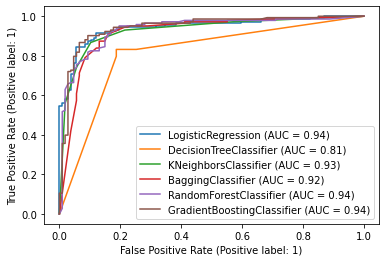

In [130]:
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":10},loc="lower right")
plt.show()

In [131]:
# Hyperparameter Tuning with Logistic Regression

from sklearn.model_selection import GridSearchCV

param_grid = {"penalty" : ['l1','l2'], "intercept_scaling" : [1,2,3],
             "random_state" : [81,131,151], "max_iter" : [100,200]}

grid_srch = GridSearchCV(LR, param_grid=param_grid)
grid_srch.fit(df_x,y)
grid_srch.best_params_

{'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l2', 'random_state': 81}

Final Model

In [132]:
Final_Model = LogisticRegression(intercept_scaling=1, max_iter=100, penalty='l2', random_state=81)

x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25, random_state =41)
Final_Model.fit(x_train,y_train)
y_preds = Final_Model.predict(x_test)
auc_scr = accuracy_score(y_test, y_preds)
print("Best Accuracy Score corresponding to ",auc_scr)
print("Classifiation Report-->\n\n",classification_report(y_test,y_preds))

Best Accuracy Score corresponding to  0.852
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.82      0.83      0.83       107
           1       0.87      0.87      0.87       143

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



In [133]:
import joblib

joblib.dump(Final_Model,"Final_Titanic_Project_Model.plk")

['Final_Titanic_Project_Model.plk']